                  Conversion_Rate  Acquisition_Cost       ROI    Clicks  \
Conversion_Rate          1.000000          0.001238  0.003479  0.002415   
Acquisition_Cost         0.001238          1.000000  0.004585  0.000141   
ROI                      0.003479          0.004585  1.000000 -0.002040   
Clicks                   0.002415          0.000141 -0.002040  1.000000   
Impressions              0.002594          0.000329  0.002257  0.000033   
Engagement_Score        -0.001108         -0.003218  0.000588 -0.001908   
ROI_Deviation            0.002775          0.512473  0.393503  0.000229   

                  Impressions  Engagement_Score  ROI_Deviation  
Conversion_Rate      0.002594         -0.001108       0.002775  
Acquisition_Cost     0.000329         -0.003218       0.512473  
ROI                  0.002257          0.000588       0.393503  
Clicks               0.000033         -0.001908       0.000229  
Impressions          1.000000          0.003030      -0.000338  
Engagemen

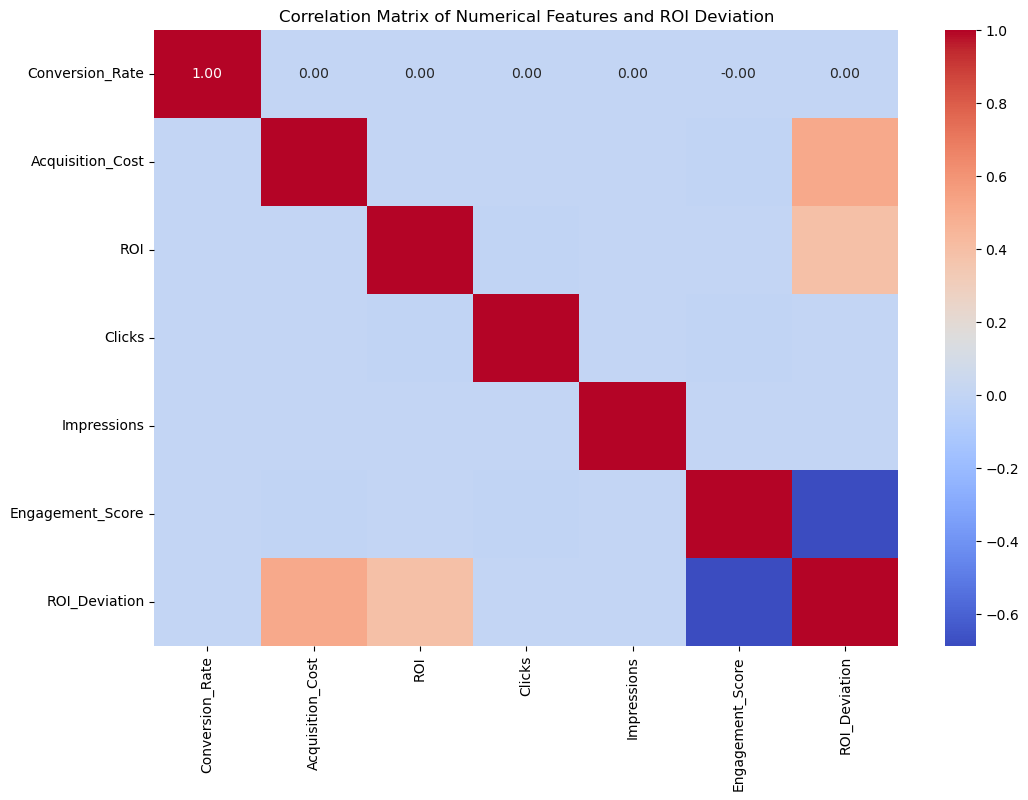

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Marketing Campaign.csv')

# Function to clean currency columns
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', '').strip())
    return x

# Apply the cleaning function to relevant columns (add more columns if needed)
if 'Acquisition_Cost' in df.columns:
    df['Acquisition_Cost'] = df['Acquisition_Cost'].apply(clean_currency)

# Ensure all numeric columns are of float type
numeric_features = ['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']
df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')

# Calculate the averages for the required variables
avg_roi = df['ROI'].mean()
avg_engagement_score = df['Engagement_Score'].mean()
avg_acquisition_cost = df['Acquisition_Cost'].mean()

# Calculate the expected ROI for each campaign
df['Expected_ROI'] = avg_roi * (df['Engagement_Score'] / avg_engagement_score) * (avg_acquisition_cost / df['Acquisition_Cost'])

# Calculate the deviation from the expected ROI
df['ROI_Deviation'] = df['ROI'] - df['Expected_ROI']

# Create a correlation matrix for the numeric features and ROI deviation
correlation_matrix = df[numeric_features + ['ROI_Deviation']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features and ROI Deviation')
plt.show()

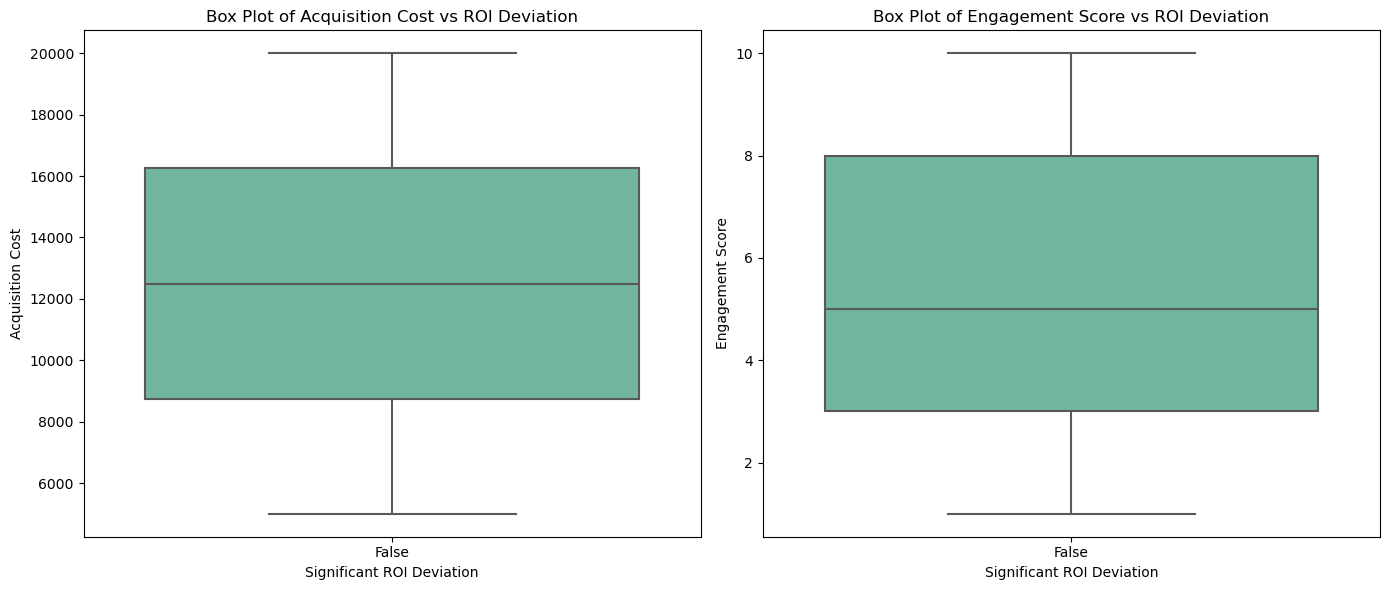

Campaigns with significant deviations:
        Campaign_ID              Company Campaign_Type Target_Audience  \
46              190  Innovate Industries    Influencer        All Ages   
48              195   DataTech Solutions         Email        All Ages   
82              387    Alpha Innovations        Search        All Ages   
110             555       NexGen Systems    Influencer        All Ages   
116             571    Alpha Innovations         Email        All Ages   
...             ...                  ...           ...             ...   
199847       199390             TechCorp       Display     Women 35-44   
199848       199392    Alpha Innovations        Search     Women 35-44   
199879       199511   DataTech Solutions    Influencer     Women 35-44   
199925       199712   DataTech Solutions  Social Media     Women 35-44   
199936       199750   DataTech Solutions        Search     Women 35-44   

       Duration Channel_Used  Conversion_Rate  Acquisition_Cost   ROI  \

In [8]:
# Identify significant deviations
Q1 = df['ROI_Deviation'].quantile(0.25)
Q3 = df['ROI_Deviation'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
significant_deviations = df[(df['ROI_Deviation'] < Q1 - threshold) | (df['ROI_Deviation'] > Q3 + threshold)]

# Plot the box plot for Acquisition Cost and Engagement Score with respect to ROI Deviation
plt.figure(figsize=(14, 6))

# Box plot for Acquisition Cost
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Acquisition_Cost'], x=df['ROI_Deviation'] > threshold, palette="Set2")
plt.title('Box Plot of Acquisition Cost vs ROI Deviation')
plt.xlabel('Significant ROI Deviation')
plt.ylabel('Acquisition Cost')

# Box plot for Engagement Score
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Engagement_Score'], x=df['ROI_Deviation'] > threshold, palette="Set2")
plt.title('Box Plot of Engagement Score vs ROI Deviation')
plt.xlabel('Significant ROI Deviation')
plt.ylabel('Engagement Score')

plt.tight_layout()
plt.show()

# Print campaigns with significant deviations
print("Campaigns with significant deviations:")
print(significant_deviations)

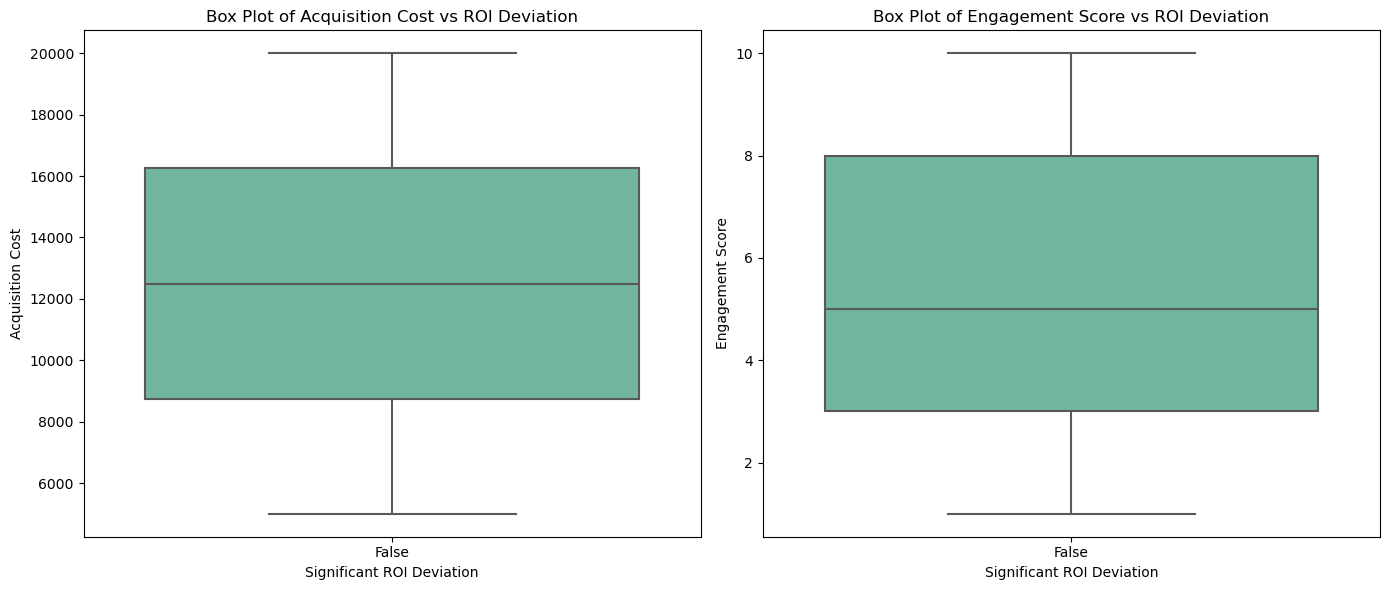

Campaigns with significant deviations:
        Campaign_ID              Company Campaign_Type Target_Audience  \
46              190  Innovate Industries    Influencer        All Ages   
48              195   DataTech Solutions         Email        All Ages   
82              387    Alpha Innovations        Search        All Ages   
110             555       NexGen Systems    Influencer        All Ages   
116             571    Alpha Innovations         Email        All Ages   
...             ...                  ...           ...             ...   
199847       199390             TechCorp       Display     Women 35-44   
199848       199392    Alpha Innovations        Search     Women 35-44   
199879       199511   DataTech Solutions    Influencer     Women 35-44   
199925       199712   DataTech Solutions  Social Media     Women 35-44   
199936       199750   DataTech Solutions        Search     Women 35-44   

       Duration Channel_Used  Conversion_Rate  Acquisition_Cost   ROI  \

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Marketing Campaign.csv')

# Function to clean currency columns
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', '').strip())
    return x

# Apply the cleaning function to relevant columns
if 'Acquisition_Cost' in df.columns:
    df['Acquisition_Cost'] = df['Acquisition_Cost'].apply(clean_currency)

# Ensure all numeric columns are of float type
numeric_features = ['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']
df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values (optional, based on your data quality)
df = df.dropna()

# Calculate the averages for the required variables
avg_roi = df['ROI'].mean()
avg_engagement_score = df['Engagement_Score'].mean()
avg_acquisition_cost = df['Acquisition_Cost'].mean()

# Calculate the expected ROI for each campaign
df['Expected_ROI'] = avg_roi * (df['Engagement_Score'] / avg_engagement_score) * (avg_acquisition_cost / df['Acquisition_Cost'])

# Calculate the deviation from the expected ROI
df['ROI_Deviation'] = df['ROI'] - df['Expected_ROI']

# Identify significant deviations using IQR method
Q1 = df['ROI_Deviation'].quantile(0.25)
Q3 = df['ROI_Deviation'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR

# Check for significant deviations
significant_deviations = df[(df['ROI_Deviation'] < Q1 - threshold) | (df['ROI_Deviation'] > Q3 + threshold)]

# Verify if significant_deviations DataFrame is empty
if significant_deviations.empty:
    print("No significant deviations found.")
else:
    # Plot the box plot for Acquisition Cost and Engagement Score with respect to ROI Deviation
    plt.figure(figsize=(14, 6))

    # Box plot for Acquisition Cost
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df['Acquisition_Cost'], x=df['ROI_Deviation'] > threshold, palette="Set2")
    plt.title('Box Plot of Acquisition Cost vs ROI Deviation')
    plt.xlabel('Significant ROI Deviation')
    plt.ylabel('Acquisition Cost')

    # Box plot for Engagement Score
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['Engagement_Score'], x=df['ROI_Deviation'] > threshold, palette="Set2")
    plt.title('Box Plot of Engagement Score vs ROI Deviation')
    plt.xlabel('Significant ROI Deviation')
    plt.ylabel('Engagement Score')

    plt.tight_layout()
    plt.show()

    # Print campaigns with significant deviations
    print("Campaigns with significant deviations:")
    print(significant_deviations)

    # Save significant deviations to a CSV file
    significant_deviations.to_csv('significant_deviations.csv', index=False)


Average CTR by Marketing Channel:
  Channel_Used       CTR
0        Email  0.140543
1     Facebook  0.140499
2   Google Ads  0.139190
3    Instagram  0.140037
4      Website  0.140971
5      YouTube  0.141196

Channels with Particularly Low CTR:
  Channel_Used      CTR
2   Google Ads  0.13919

Average CTR by Customer Segment:
      Customer_Segment       CTR
0         Fashionistas  0.139953
1              Foodies  0.141413
2    Health & Wellness  0.139857
3  Outdoor Adventurers  0.139665
4     Tech Enthusiasts  0.141127

Customer Segments with Particularly Low CTR:
Empty DataFrame
Columns: [Customer_Segment, CTR]
Index: []


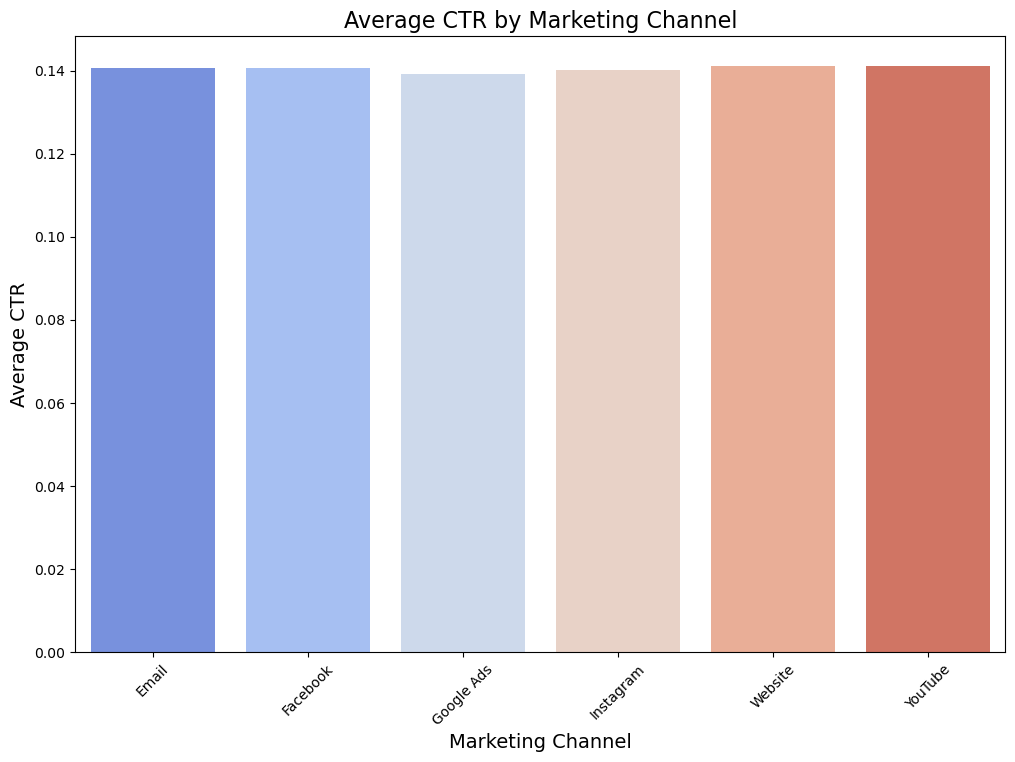

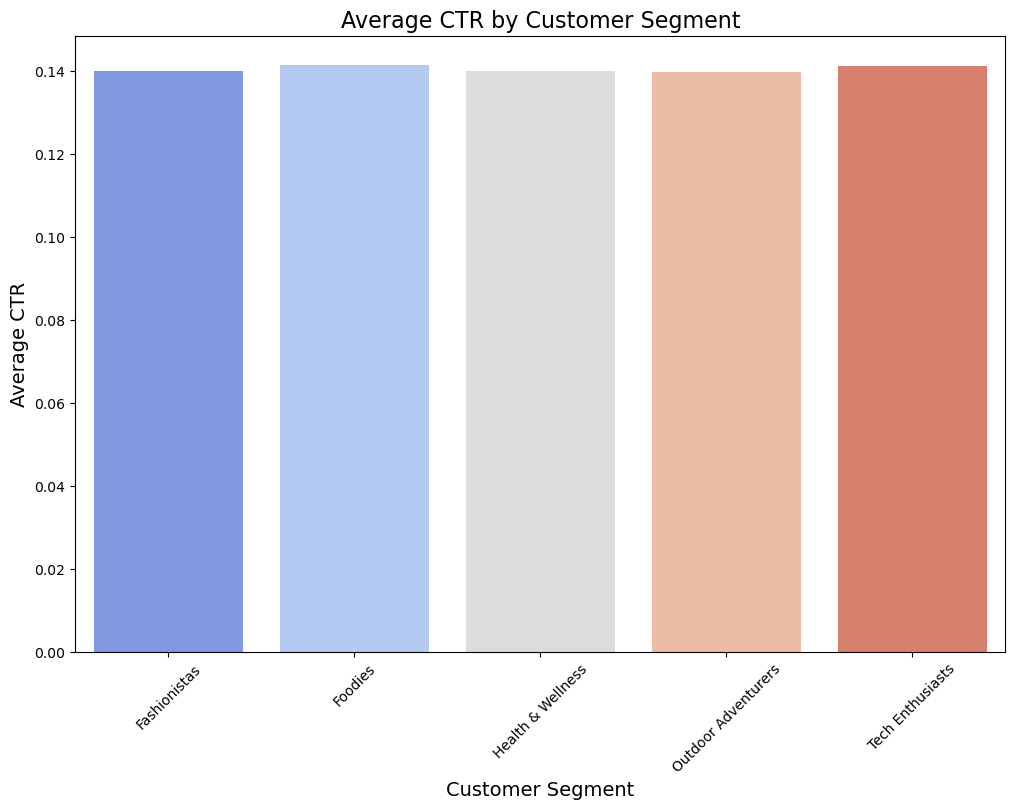

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Marketing Campaign.csv')

# Ensure clicks and impressions are of float type
df['Clicks'] = df['Clicks'].apply(pd.to_numeric, errors='coerce')
df['Impressions'] = df['Impressions'].apply(pd.to_numeric, errors='coerce')

# Calculate CTR
df['CTR'] = df['Clicks'] / df['Impressions']

# Group by marketing channels and calculate average CTR
channel_ctr = df.groupby('Channel_Used')['CTR'].mean().reset_index()

# Group by customer segments and calculate average CTR
segment_ctr = df.groupby('Customer_Segment')['CTR'].mean().reset_index()

# Identify channels with particularly low CTR
low_ctr_channels = channel_ctr[channel_ctr['CTR'] < channel_ctr['CTR'].mean() - channel_ctr['CTR'].std()]

# Identify segments with particularly low CTR
low_ctr_segments = segment_ctr[segment_ctr['CTR'] < segment_ctr['CTR'].mean() - segment_ctr['CTR'].std()]

# Print the results
print("Average CTR by Marketing Channel:")
print(channel_ctr)
print("\nChannels with Particularly Low CTR:")
print(low_ctr_channels)

print("\nAverage CTR by Customer Segment:")
print(segment_ctr)
print("\nCustomer Segments with Particularly Low CTR:")
print(low_ctr_segments)

# Plotting the average CTR by marketing channel
plt.figure(figsize=(12, 8))
sns.barplot(x='Channel_Used', y='CTR', data=channel_ctr, palette='coolwarm')
plt.title('Average CTR by Marketing Channel', fontsize=16)
plt.xlabel('Marketing Channel', fontsize=14)
plt.ylabel('Average CTR', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Plotting the average CTR by customer segment
plt.figure(figsize=(12, 8))
sns.barplot(x='Customer_Segment', y='CTR', data=segment_ctr, palette='coolwarm')
plt.title('Average CTR by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=14)
plt.ylabel('Average CTR', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load your dataset
df = pd.read_csv('Marketing Campaign.csv')

# Function to clean currency columns
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', '').strip())
    return x

# Apply the cleaning function to relevant columns (add more columns if needed)
if 'Acquisition_Cost' in df.columns:
    df['Acquisition_Cost'] = df['Acquisition_Cost'].apply(clean_currency)

# Ensure all numeric columns are of float type
numeric_features = ['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']
df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')

# Calculate the CTR
df['CTR'] = df['Clicks'] / df['Impressions']

# Drop rows with missing values (optional, based on your data quality)
df = df.dropna(subset=numeric_features + ['CTR'])  # Only drop rows where numeric fields or CTR are NaN

# Debug: Check the data types and shape after cleanup
print(f"Data types after cleanup: \n{df.dtypes}\n")
print(f"Data shape after cleanup: {df.shape}\n")

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=['Channel_Used', 'Customer_Segment'], drop_first=True)

# Debug: Check the data types and shape after transforming categorical variables
print(f"Data types after transforming categorical variables: \n{df.dtypes}\n")
print(f"Data shape after transforming categorical variables: {df.shape}\n")

# Ensure all columns are of numeric type before scaling
df = df.apply(pd.to_numeric, errors='coerce')

# Debug: Check if any rows still contain NaN values
print(f"Number of NaNs per column before final drop: \n{df.isna().sum()}\n")

# Drop remaining rows with any NaN values
df = df.dropna()

# Debug: Check the final data shape and if any columns have NaN values
print(f"Final data shape: {df.shape}\n")
print(f"Columns with NaN values: \n{df.isna().sum()}\n")

# Define target variable and features
X = df.drop(['ROI'], axis=1)
y = df['ROI']

# Debug: Ensure X and y are not empty
print(f"Features DataFrame shape (X): {X.shape}")
print(f"Target Series shape (y): {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Analyze feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance for Predicting ROI')
plt.show()

Data types after cleanup: 
Campaign_ID           int64
Company              object
Campaign_Type        object
Target_Audience      object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost    float64
ROI                 float64
Location             object
Language             object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
Date                 object
CTR                 float64
dtype: object

Data shape after cleanup: (200000, 17)

Data types after transforming categorical variables: 
Campaign_ID                               int64
Company                                  object
Campaign_Type                            object
Target_Audience                          object
Duration                                 object
Conversion_Rate                         float64
Acquisition_Cost                        float64
ROI                                     float64
Loca

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

Correlation between Engagement Score and Conversion Rate: -0.00


C:\Users\aakas\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


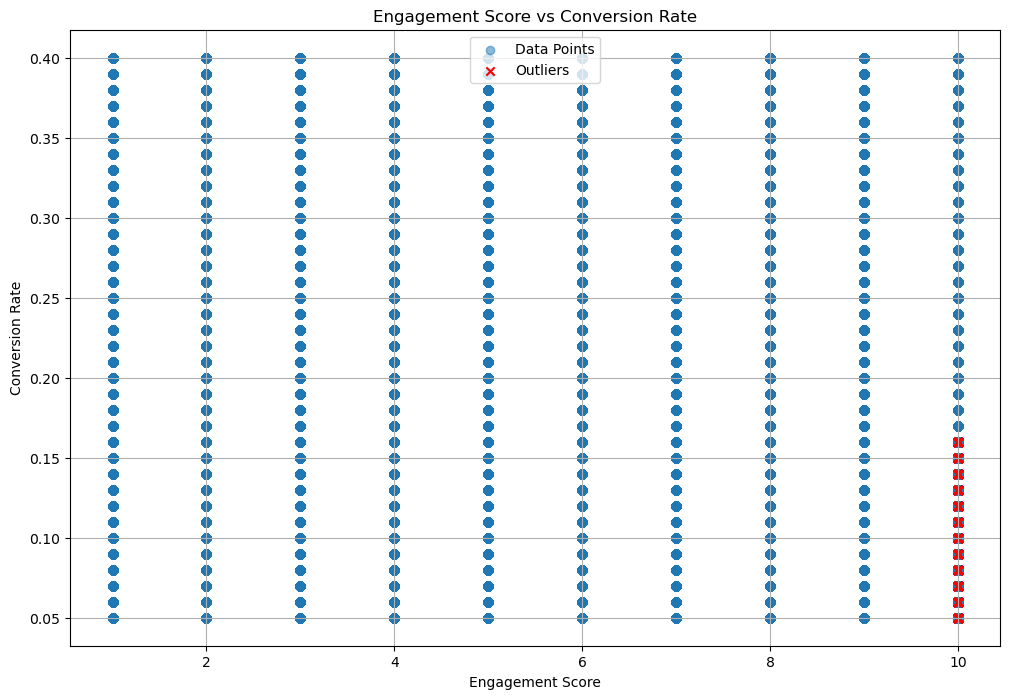

Outliers where engagement is high but conversion rate is low:
        Campaign_ID              Company Campaign_Type Target_Audience  \
28              120       NexGen Systems       Display        All Ages   
49              203   DataTech Solutions       Display        All Ages   
51              210  Innovate Industries       Display        All Ages   
54              220  Innovate Industries    Influencer        All Ages   
61              278   DataTech Solutions         Email        All Ages   
...             ...                  ...           ...             ...   
160281       199848             TechCorp    Influencer     Women 25-34   
160287       199870             TechCorp       Display     Women 25-34   
160288       199874  Innovate Industries         Email     Women 25-34   
160304       199941       NexGen Systems       Display     Women 25-34   
160305       199943    Alpha Innovations       Display     Women 25-34   

       Duration Channel_Used  Conversion_Rate Acq

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Marketing Campaign.csv')

# Ensure relevant columns are of float type
df['Engagement_Score'] = pd.to_numeric(df['Engagement_Score'], errors='coerce')
df['Conversion_Rate'] = pd.to_numeric(df['Conversion_Rate'], errors='coerce')

# Drop rows with missing values in these columns
df = df.dropna(subset=['Engagement_Score', 'Conversion_Rate'])

# Calculate correlation between Engagement Score and Conversion Rate
correlation = df['Engagement_Score'].corr(df['Conversion_Rate'])
print(f"Correlation between Engagement Score and Conversion Rate: {correlation:.2f}")

# Define thresholds for high engagement (e.g., top 10% of engagement scores)
high_engagement_threshold = df['Engagement_Score'].quantile(0.90)

# Identify outliers where engagement is high but conversion rate is low
outliers = df[(df['Engagement_Score'] > high_engagement_threshold) & 
              (df['Conversion_Rate'] < df['Conversion_Rate'].median())]

# Plot scatter plot with engagement score vs. conversion rate
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(df['Engagement_Score'], df['Conversion_Rate'], alpha=0.5, label='Data Points')
plt.scatter(outliers['Engagement_Score'], outliers['Conversion_Rate'], color='red', label='Outliers', marker='x')

plt.title('Engagement Score vs Conversion Rate')
plt.xlabel('Engagement Score')
plt.ylabel('Conversion Rate')
plt.legend()
plt.grid(True)
plt.show()

# Print outliers
if not outliers.empty:
    print("Outliers where engagement is high but conversion rate is low:")
    print(outliers)
else:
    print("No outliers found where engagement is high but conversion rate is low.")
